In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/database.sqlite
/kaggle/input/iris/Iris.csv


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
data = pd.read_csv("/kaggle/input/iris/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Problem:

Given dataset contains numerical columns

Iris-setosa


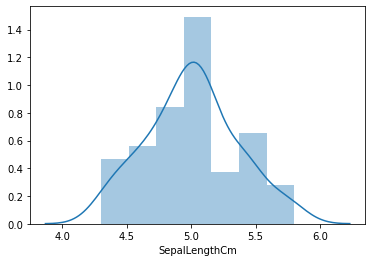

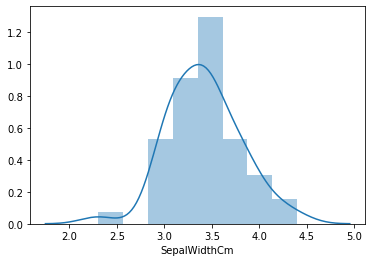

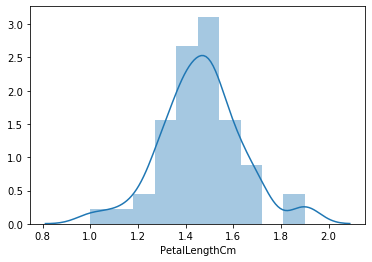

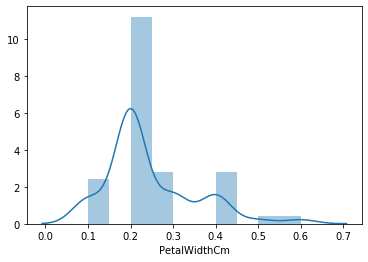

Iris-versicolor


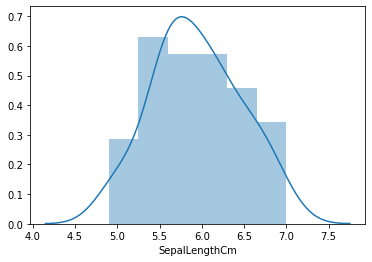

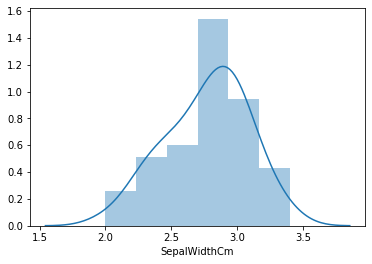

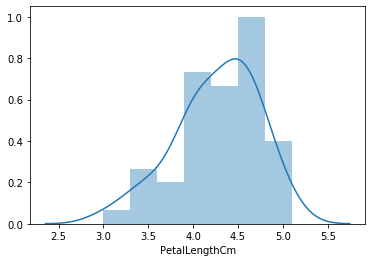

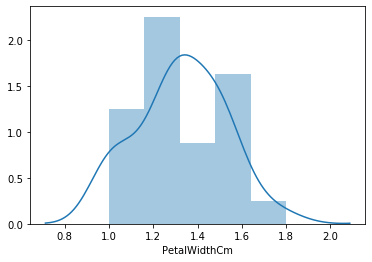

Iris-virginica


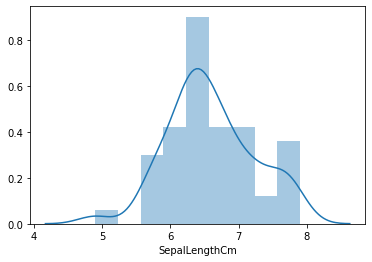

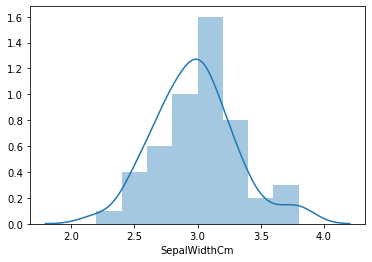

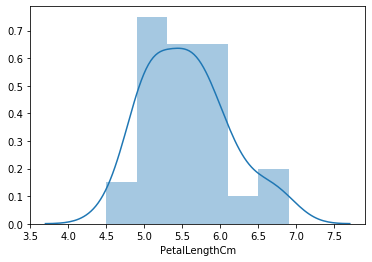

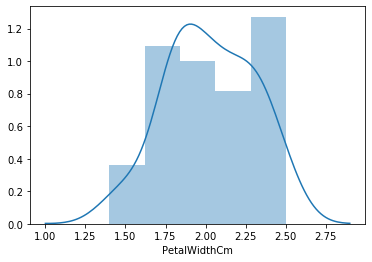

In [18]:
for species in data['Species'].unique():
    type_of_species = data[data["Species"] == species]
    print(species)
    columns = type_of_species.columns[1:5]
    for i in columns:
        sns.distplot(type_of_species[i])
        plt.show()

## Assumption:

Since all columns follow normal distribution we will consider it as gausian distribution.

In [68]:
def predictFlower(SL, SW, PL, PW):
    p_species = []
    p_sl_species = []
    p_sw_species = []
    p_pl_species = []
    p_pw_species = []
    
    for species in data['Species'].unique():
        type_of_species = data[data["Species"] == species]
        
        p_species.append(species)
        
        columns = type_of_species.columns[1:5]
        for i in columns:
        
            # Calculating Mean For Given Flower Type
            mean = type_of_species[i].mean()

            # Calculating SD For Given Flower Type
            standard_deviation = type_of_species[i].std()
            
            # Putting the probabilies in respective list
            if(i == "SepalLengthCm"):
                p_sl_species.append((1/(standard_deviation*math.sqrt(2*math.pi)))*math.e**(-0.5*math.pow((SL-mean)/standard_deviation,2)))
            if(i == "SepalWidthCm"):
                p_sw_species.append((1/(standard_deviation*math.sqrt(2*math.pi)))*math.e**(-0.5*math.pow((SW-mean)/standard_deviation,2)))
            if(i == "PetalLengthCm"):
                p_pl_species.append((1/(standard_deviation*math.sqrt(2*math.pi)))*math.e**(-0.5*math.pow((PL-mean)/standard_deviation,2)))
            if(i == "PetalWidthCm"):
                p_pw_species.append((1/(standard_deviation*math.sqrt(2*math.pi)))*math.e**(-0.5*math.pow((PW-mean)/standard_deviation,2)))

    # Finding the final probability: P(species|X)
    p_final = [a*b*c*d*(50/150) for a,b,c,d in zip(p_sl_species, p_sw_species, p_pl_species, p_pw_species)]
    
    # Index where maximum probability is found
    name = p_final.index(max(p_final))
    return p_species[name]

In [70]:
predictFlower(4.7, 3.7, 2, 0.3)

'Iris-setosa'